In [30]:
## cats and classification
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.callbacks import TensorBoard

In [31]:
### Specify the Cats and Dog folder 
DATADIR='/home/vagrant/tensorflow_machine_learning/KERAS'
CAT_DATADIR='/home/vagrant/tensorflow_machine_learning/KERAS/Cat'
DOG_DATADIR='/home/vagrant/tensorflow_machine_learning/KERAS/Dog'

In [32]:
CATAGORIES = ['Dog','Cat']
## we iterate bthrough the data and join with string and then pull the data

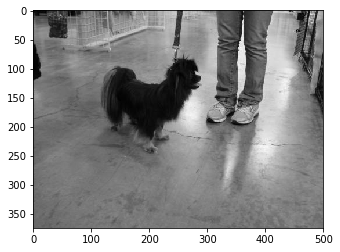

In [33]:
## pull the image with for loop
## we can directly pull the data
## or we can do it after the os.path.join
for catagories in CATAGORIES:
    path = os.path.join(DATADIR,catagories)   #adding path to cats and dog list
    for img in os.listdir(path):  ## getting a list of file in the DIR
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        ## adding the image file with the path and then assign to variable
        ##and converted to GRAYSCALE cause it has low size
        plt.imshow(img_array,cmap='gray')
        #lets see the image
        break
    break
        
    
    

In [5]:
## we must need to normalize the data
## thats means the resizing the data
## x and y means shape should be same


In [6]:
IMG_SIZE= 60
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))

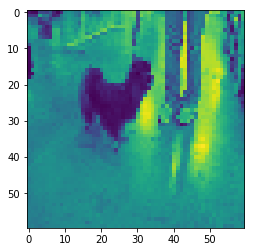

In [7]:
plt.imshow(new_array)

In [8]:
## well thats not very good but not that bad


In [9]:
## now thigns got serious

In [10]:
## creating training data

training_data=[]

def create_training_data():
    for catagories in CATAGORIES:
        path = os.path.join(DATADIR,catagories)   #adding path to cats and dog list
        class_num = CATAGORIES.index(catagories) ## to find the catagory
        
        ## first one will be 0 means DOG is 0 and CAT is1
        
        for img in os.listdir(path):  ## getting a list of file in the DIR
            try:
                
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                ## adding the image file with the path and then assign to variable
                ##and converted to GRAYSCALE cause it has low size

                #we need to convert to dog and cat as 0 and 1 
                # cause in classification you cant map an output to string

                ## now resize the data
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                ## now append all this thing
                #print ('appending ...')
                training_data.append([new_array,class_num])
                #print ('appended ...')
                #we append the picture as well as what it is
            except Exception as e:
                pass
            
        
    
create_training_data()

In [11]:
print(len(training_data))

192


In [12]:
for sample in training_data[:10]:
    print (sample[1])

0
0
0
0
0
0
0
0
0
0


In [13]:
## suffle the data

import random 
random.shuffle(training_data)
for sample in training_data[:10]:
    print (sample[1])

1
0
0
0
1
0
0
1
0
1


In [14]:
## extract the feture and the label
X=[]
Y=[]
for features,label in training_data:
    X.append(features)
    Y.append(label)

In [15]:
## now we the real normalizing option here
## we get  the x and Y
## Y is ok its a list
## but X have to be a numpy array and this array has to normalize to the image size that
## we choose

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
## just use the -1 at first it can be anu number then the two important parameter that
## shows us the shape and last 1 is gor grayscale and 3 for color image remember it


In [16]:
# we have all the processed training  data 
## save it
import pickle
pickle_out=open('data.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

In [17]:

pickle_out=open('data_y.pickle','wb')
pickle.dump(Y,pickle_out)
pickle_out.close()

In [18]:
##convolutional nural network
## usage of convnet


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [20]:
## its all about different different layers we add different different layer and 
## see the result

In [21]:
X.shape[1:]

(60, 60, 1)

In [22]:
X=tf.keras.utils.normalize(X)  ## normalize the data

In [23]:
##connet thats why conv2D
##(3,3) input image size
## input imahe shape if we start from 0 it will ahow that shape of the whole
## pic because its a multi dimentional array


In [24]:
import time
NAME="cats and dogs--cnn-64x2-without-dense{}".format(int(time.time()))
tensorbord=TensorBoard(log_dir='logs/{}'.format(NAME))

In [25]:
## creating model
model = Sequential()
###layer1
model.add(Conv2D(64,(3,3),activation='relu',input_shape=X.shape[1:]))
##256 is the number of filter
###layer2
#model.add(Activation('relu')) ## this is not ac
###layer3
model.add(MaxPooling2D(pool_size=(2,2)))## after CONV2D we need to maxpooling
                                        ##to take the feture from the image
## layer4
model.add(Conv2D(64,(3,3),activation='relu'))
###layer5
#model.add(Activation('relu'))
###layer6
model.add(MaxPooling2D(pool_size=(2,2)))
##layer7
model.add(Flatten())
###layer8
model.add(Dense(64))
###layer9
model.add(Dense(1))
###layer10
model.add(Activation('sigmoid'))


model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [26]:
## trying to train a new new model
model.fit(X,Y,epochs=10,batch_size=32,validation_split=0.1,callbacks=[tensorbord])

Train on 172 samples, validate on 20 samples
Epoch 1/10
172/172 [==============================] - 11s 63ms/step - loss: 1.0403 - acc: 0.4884 - val_loss: 0.7227 - val_acc: 0.4000
Epoch 2/10
172/172 [==============================] - 10s 56ms/step - loss: 0.6998 - acc: 0.5116 - val_loss: 0.7141 - val_acc: 0.4000
Epoch 3/10
172/172 [==============================] - 9s 51ms/step - loss: 0.6922 - acc: 0.5116 - val_loss: 0.6852 - val_acc: 0.6000
Epoch 4/10
172/172 [==============================] - 9s 53ms/step - loss: 0.7102 - acc: 0.4419 - val_loss: 0.6819 - val_acc: 0.6000
Epoch 5/10
172/172 [==============================] - 9s 51ms/step - loss: 0.7105 - acc: 0.4884 - val_loss: 0.6956 - val_acc: 0.4000
Epoch 6/10
172/172 [==============================] - 9s 51ms/step - loss: 0.6926 - acc: 0.5233 - val_loss: 0.7017 - val_acc: 0.4000
Epoch 7/10
172/172 [==============================] - 9s 51ms/step - loss: 0.6924 - acc: 0.5174 - val_loss: 0.6941 - val_acc: 0.4000
Epoch 8/10
172/172 [==

In [27]:
## after seeing the TENSORBOARD we can see the model with out the dense layer 
## has good performence

## optimize model using Tensorboard

In [28]:
model.save('cnnmodel.model')